In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('./rs/results_resnet101.csv')
data.sample(5)

,Unnamed: 0,arch,activation,attack,iterations,eps 2,eps 4,eps 6,eps 8,eps 10,SROCC
113,113,resnet101-Linearity+cayley=True,relu,PGD,3,0.063002,0.060756,0.059553,0.059051,0.059727,0.919299
31,31,resnet101-Linearity,Fsilu,PGD,5,0.247162,0.242627,0.215391,0.174320,0.113356,0.823418
73,73,debiasedresnet101-Linearity,relu,PGD,8,0.812337,0.855953,0.766580,0.664678,0.577658,0.922235
55,55,resnet101-Linearity+prune=0.1l2,relu,PGD,1,0.196334,0.149303,0.091360,0.040655,-0.010637,0.918402
75,75,resnet101-Linearity+cayley_conv=True,relu,PGD,8,0.700986,0.612861,0.521362,0.432664,0.361846,0.913819


In [3]:
data['arch'] = data['arch'].apply(lambda s: s.replace('-Linearity', ''))
data

,Unnamed: 0,arch,activation,attack,iterations,eps 2,eps 4,eps 6,eps 8,eps 10,SROCC
0,0,resnet101,relu_silu,PGD,1,0.173774,0.145685,0.107567,0.072294,0.038994,0.922440
1,1,resnet101,relu,PGD,1,0.173924,0.149412,0.115922,0.085430,0.057938,0.922532
2,2,resnet101,relu_silu,PGD,3,0.402172,0.423467,0.415740,0.401260,0.383497,0.922440
3,3,resnet101,relu,PGD,3,0.409888,0.436228,0.432037,0.421080,0.407914,0.922532
4,4,resnet101,relu,PGD,5,0.591132,0.653527,0.644708,0.592618,0.539537,0.922532
...,...,...,...,...,...,...,...,...,...,...,...
111,111,apgd_ssim_eps2,relu,PGD,8,0.134360,0.242388,0.278041,0.286434,0.283151,0.886325
112,112,resnet101+cayley=True,relu,PGD,1,0.039866,0.037204,0.035211,0.033772,0.032925,0.919299
113,113,resnet101+cayley=True,relu,PGD,3,0.063002,0.060756,0.059553,0.059051,0.059727,0.919299
114,114,resnet101+cayley=True,relu,PGD,5,0.083598,0.087606,0.088760,0.083275,0.077259,0.919299


In [4]:
data = data.drop('Unnamed: 0', axis=1)
data.sample(5)

,arch,activation,attack,iterations,eps 2,eps 4,eps 6,eps 8,eps 10,SROCC
99,vonenet50,relu,PGD,8,0.860813,1.445140,1.587822,1.551788,1.453614,0.858145
56,resnet101,Felu,PGD,8,0.606904,0.677745,0.668948,0.645140,0.618572,0.860989
115,resnet101+cayley=True,relu,PGD,8,0.116786,0.133633,0.126420,0.110664,0.095394,0.919299
12,resnet101,silu,PGD,5,0.570802,0.629447,0.616695,0.560020,0.504072,0.921465
104,free_ssim_eps2,relu,PGD,1,0.000226,-0.028650,-0.020060,-0.010421,0.003081,0.912087


In [5]:
baseline = [('resnet101', 'relu')]
group_activation = [('resnet101', 'relu'),
                    ("resnet101", "silu"), 
                    ("resnet101", "relu_silu"),
                    ("resnet101", "Frelu_silu"),
                    ("resnet101", "relu_elu"),
                    ("resnet101", "Frelu_elu"),
                    ("resnet101", "relu_gelu"),
                    ("resnet101", "Fsilu"),
                    ("resnet101", "elu"),
                    ("resnet101", "gelu"),
                    ("resnet101", "Fgelu"),
                    ("resnet101", "Felu") ]

group_wd = [("resnet18", "relu"), 
            ("resnet34", "relu"), 
            ("resnet50", "relu"),
            ("wideresnet50", "relu"),
            ("resnet101", "relu")]
group_pruning = [("resnet101+prune=0.1pls", "relu"),
                 ("resnet101+prune=0.1l1", "relu"),
                 ("resnet101+prune=0.1l2", "relu")]

group_feature_ex = [("debiasedresnet101","relu")]
group_special = [("vonenet101", "relu"), 
                 ('resnet101+gr=True','relu'), 
] + group_feature_ex
group_cayley = [
    ('resnet101+cayley_conv=True', 'relu'), 
    ("resnet101+cayley_pool=True", "relu"),
    ("resnet101+cayley=True", "relu"),
]
group_adv = [
    ("apgd_ssim", "relu"),
    ("apgd_ssim_eps2", "relu"),
    ("free_ssim_eps2", "relu")
]
# group_combinatioins = [("debiasedresnet50-Linearity+prune=0.1pls", "relu"), 
#                        ("debiasedresnet50-Linearity+prune=0.1pls", "elu"), 
#                        ("debiasedresnet50-Linearity", "elu"), 
#                        ("resnet50-Linearity+prune=0.1pls", "Felu"), 
#                        ("resnet50-Linearity+prune=0.1pls", "silu"),
#                        ("resnet50-Linearity-noise", "Felu")
#                        ]
group_combinatioins = []

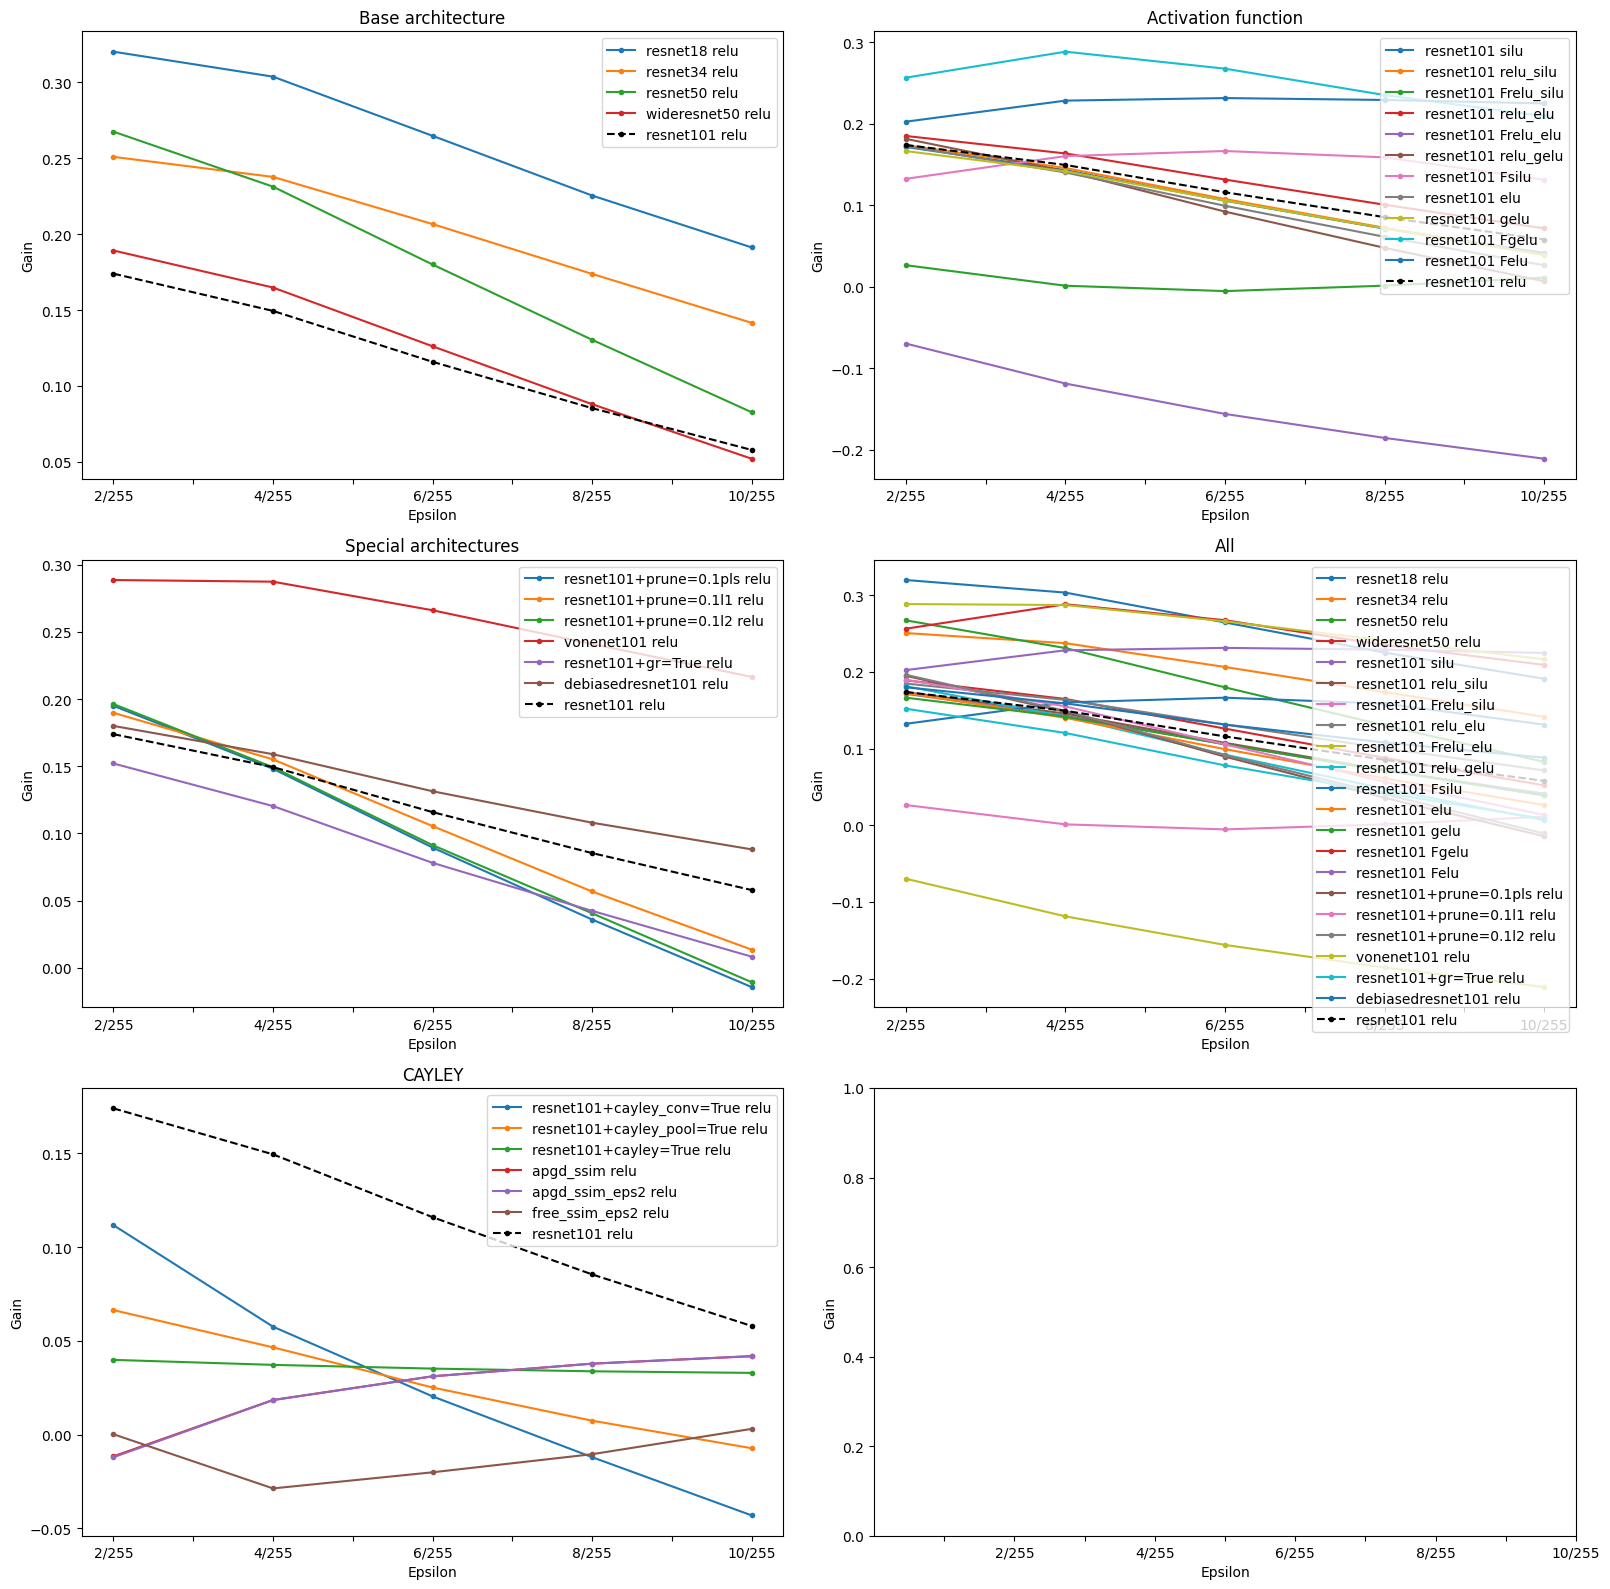

In [6]:
groups = [group_wd, group_activation, group_pruning+group_special, group_wd+group_activation+group_pruning+group_special, group_cayley+group_adv]
epsilons = [2, 4, 6, 8, 10]
eps_labels = ['','2/255','','4/255','','6/255','','8/255','','10/255']
iters = 1.0

fig, axs = plt.subplots(3,2, figsize=(16,16), subplot_kw={"xticks": list(range(1,11)),"xticklabels": eps_labels, "xlabel": "Epsilon", "ylabel": "Gain"})

axs[0,0].set_title("Base architecture")
axs[0,1].set_title("Activation function")
axs[1,0].set_title("Special architectures")
axs[1,1].set_title("All")
axs[2,0].set_title("CAYLEY")
fig.tight_layout()
axs  = axs.flatten()

for i in range(len(groups)):
    axis = axs[i]
    grp = groups[i]
    for arch, activ in grp:
        y_axis = data[(data["arch"]==arch)&(data["iterations"]==iters)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
        # if ((arch, activ) == baseline[0]):
        #     axis.plot(epsilons, y_axis,'k--', marker=".",label=f"{arch} {activ}")
        # else:
        if ((arch, activ) != baseline[0]):
            axis.plot(epsilons, y_axis, marker=".",label=f"{arch} {activ}")
    y_axis = data[(data["arch"]==baseline[0][0])&(data["iterations"]==iters)&(data["activation"]==baseline[0][1])].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
    axis.plot(epsilons, y_axis,'k--', marker=".",label=f"{baseline[0][0]} {baseline[0][1]}")
    axis.legend(loc="upper right")

plt.show()

In [7]:
x = [2, 4, 6, 8, 10]
grp = set(group_wd+group_activation+group_pruning+group_special+group_cayley+group_adv)
iters = [1, 3, 5, 8]

df_pgd = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result_iter=1','result_iter=3','result_iter=5', 'result_iter=8'])

for arch, activ in grp:
    y_axises = []
    for it in iters:
        y_axis = data[(data["arch"]==arch)&(data["iterations"]==it)&(data["activation"]==activ)]\
            .loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
        y_axises.append(y_axis)
    srocc = data[(data["arch"]==arch)&(data["iterations"]==iters[0])&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df_pgd.loc[len(df_pgd)] = {
                                'architecture': arch, 
                                'activation': activ,
                                'SROCC': float(srocc),
                                'result_iter=1': (np.trapezoid(y_axises[0], x)),
                                'result_iter=3': (np.trapezoid(y_axises[1], x)),
                                'result_iter=5': (np.trapezoid(y_axises[2], x)),
                                'result_iter=8': (np.trapezoid(y_axises[3], x))
                                }
baseline_res_iter1 = df_pgd[(df_pgd['architecture']==baseline[0][0])&(df_pgd['activation']==baseline[0][1])]['result_iter=1'].values[0]
baseline_res_iter3 = df_pgd[(df_pgd['architecture']==baseline[0][0])&(df_pgd['activation']==baseline[0][1])]['result_iter=3'].values[0]
baseline_res_iter5 = df_pgd[(df_pgd['architecture']==baseline[0][0])&(df_pgd['activation']==baseline[0][1])]['result_iter=5'].values[0]
baseline_res_iter8 = df_pgd[(df_pgd['architecture']==baseline[0][0])&(df_pgd['activation']==baseline[0][1])]['result_iter=8'].values[0]
# print(baseline_res_iter1)
# print( (baseline_res_iter1-df_pgd['result_iter=1'])/baseline_res_iter1)

df_pgd['gain_iter=1'] = (baseline_res_iter1 - df_pgd['result_iter=1'])/baseline_res_iter1 *100
df_pgd['gain_iter=3'] = (baseline_res_iter3 - df_pgd['result_iter=3'])/baseline_res_iter3 *100
df_pgd['gain_iter=5'] = (baseline_res_iter5 - df_pgd['result_iter=5'])/baseline_res_iter5 *100
df_pgd['gain_iter=8'] = (baseline_res_iter8 - df_pgd['result_iter=8'])/baseline_res_iter8 *100

In [8]:
df_pgd.sort_values('result_iter=8').style.hide()

architecture,activation,SROCC,result_iter=1,result_iter=3,result_iter=5,result_iter=8,gain_iter=1,gain_iter=3,gain_iter=5,gain_iter=8
resnet101,Frelu_elu,0.891110,-1.201024,-1.512276,-1.636411,-1.653133,228.673057,144.524651,133.312013,126.362397
resnet101+cayley=True,relu,0.919299,0.285165,0.481450,0.680141,0.953614,69.448577,85.825090,86.154550,84.792793
resnet101,Fsilu,0.823418,1.234878,1.443750,1.625192,1.706758,-32.299977,57.492895,66.916378,72.782460
resnet101+cayley_pool=True,relu,0.923064,0.217470,1.049561,1.434378,1.731355,76.701135,69.098674,70.800735,72.390204
apgd_ssim,relu,0.886325,0.205102,1.005235,1.571757,2.031024,78.026216,70.403722,68.004141,67.611407
apgd_ssim_eps2,relu,0.886325,0.204553,1.005128,1.573244,2.031235,78.085005,70.406869,67.973867,67.608046
free_ssim_eps2,relu,0.912087,-0.114954,0.805945,1.519623,2.149589,112.315720,76.271237,69.065410,65.720657
resnet101+cayley_conv=True,relu,0.913819,0.200640,2.444552,3.411112,4.196605,78.504168,28.027122,30.560839,33.077047
resnet101,elu,0.923398,0.800455,2.943120,4.069737,4.991486,14.242383,13.348223,17.153373,20.401134
resnet101,Felu,0.860989,1.805197,3.940007,4.732257,5.209142,-93.401789,-16.002286,3.666637,16.930184


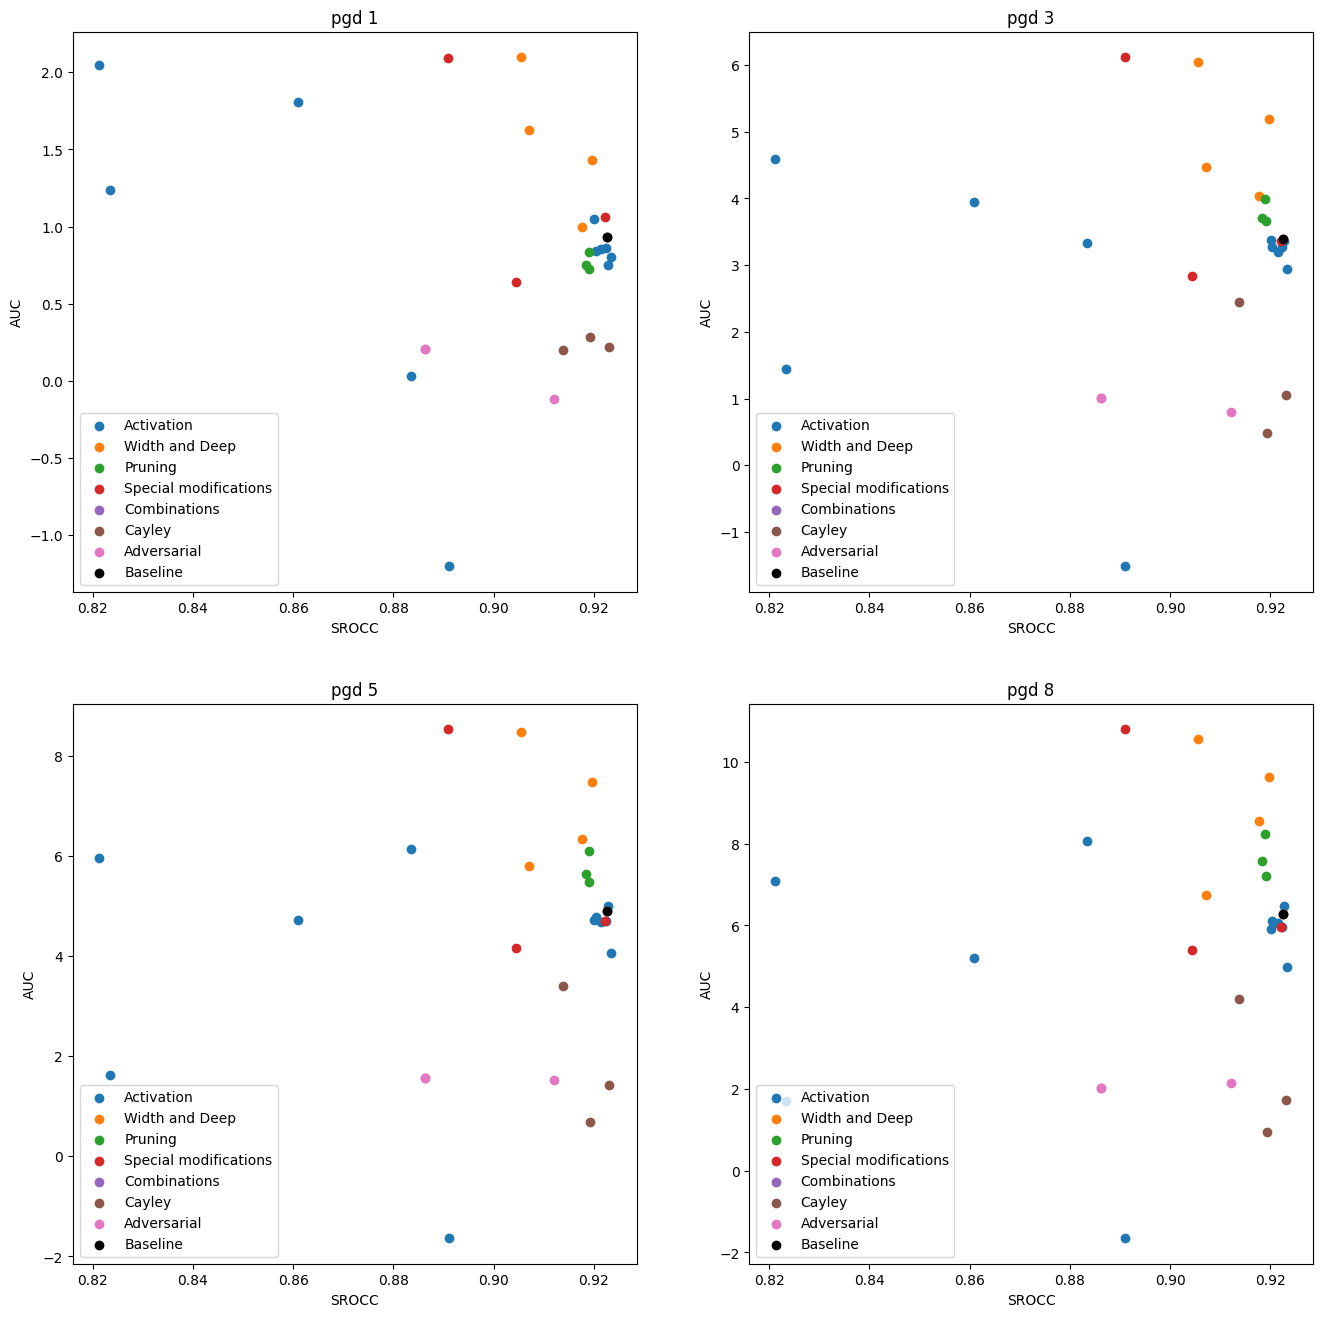

In [10]:
import warnings
warnings.filterwarnings('ignore')
import random
random.seed(40)

types = [group_activation, group_wd, group_pruning, group_special, group_combinatioins, group_cayley, group_adv]
labels = ["Activation", "Width and Deep", "Pruning", "Special modifications", "Combinations", "Cayley", "Adversarial"]
iters = [1, 3, 5, 8]

fig, ax = plt.subplots(2,2, figsize=(16,16))
ax = ax.flatten()

for i,axis in enumerate(ax):
    axis.set_title(f'pgd {iters[i]}')
    axis.set_xlabel('SROCC')
    axis.set_ylabel('AUC')


for j, type_ in enumerate(types):
    label = labels[j]
    mask = (df_pgd['architecture']==None)
    for arch, activ in type_:
        mask |= (df_pgd['architecture']==arch)&(df_pgd['activation']==activ)
    df_type = df_pgd[mask]
    for i in range(len(iters)):
        axis = ax[i]
        axis.scatter(df_type['SROCC'], df_type[f'result_iter={iters[i]}'], label=label)

for i in range(len(iters)):
    axis = ax[i]
    df_baseline = df_pgd[(df_pgd['architecture']=='resnet101')&(df_pgd['activation']=='relu')]
    axis.scatter(df_baseline['SROCC'], df_baseline[f'result_iter={iters[i]}'], color='black', label="Baseline")
    axis.legend(loc='lower left')


plt.show()
fig.savefig('scatter_types_resnet101.png')

In [13]:
x = [2, 4, 6]
grp = set(group_wd+group_activation+group_pruning+group_special)
iters = [1, 3, 5, 8]

df_pgd_small_eps = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result_iter=1','result_iter=3','result_iter=5', 'result_iter=8'])

for arch, activ in grp:
    y_axises = []
    for it in iters:
        y_axis = data[(data["arch"]==arch)&(data["iterations"]==it)&(data["activation"]==activ)]\
            .loc[:,f"eps {epsilons[0]}": f"eps {epsilons[len(x)-1]}"].values.tolist()[0]
        y_axises.append(y_axis)
    srocc = data[(data["arch"]==arch)&(data["iterations"]==iters[0])&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df_pgd_small_eps.loc[len(df_pgd_small_eps)] = {
                                'architecture': arch, 
                                'activation': activ,
                                'SROCC': float(srocc),
                                'result_iter=1': (np.trapezoid(y_axises[0], x)),
                                'result_iter=3': (np.trapezoid(y_axises[1], x)),
                                'result_iter=5': (np.trapezoid(y_axises[2], x)),
                                'result_iter=8': (np.trapezoid(y_axises[3], x))
                                }
baseline_res_iter1 = df_pgd_small_eps[(df_pgd_small_eps['architecture']==baseline[0][0])&(df_pgd_small_eps['activation']==baseline[0][1])]['result_iter=1'].values[0]
baseline_res_iter3 = df_pgd_small_eps[(df_pgd_small_eps['architecture']==baseline[0][0])&(df_pgd_small_eps['activation']==baseline[0][1])]['result_iter=3'].values[0]
baseline_res_iter5 = df_pgd_small_eps[(df_pgd_small_eps['architecture']==baseline[0][0])&(df_pgd_small_eps['activation']==baseline[0][1])]['result_iter=5'].values[0]
baseline_res_iter8 = df_pgd_small_eps[(df_pgd_small_eps['architecture']==baseline[0][0])&(df_pgd_small_eps['activation']==baseline[0][1])]['result_iter=8'].values[0]
# print(baseline_res_iter1)
# print( (baseline_res_iter1-df_pgd['result_iter=1'])/baseline_res_iter1)

df_pgd_small_eps['gain_iter=1'] = (baseline_res_iter1 - df_pgd_small_eps['result_iter=1'])/baseline_res_iter1 *100
df_pgd_small_eps['gain_iter=3'] = (baseline_res_iter3 - df_pgd_small_eps['result_iter=3'])/baseline_res_iter3 *100
df_pgd_small_eps['gain_iter=5'] = (baseline_res_iter5 - df_pgd_small_eps['result_iter=5'])/baseline_res_iter5 *100
df_pgd_small_eps['gain_iter=8'] = (baseline_res_iter8 - df_pgd_small_eps['result_iter=8'])/baseline_res_iter8 *100

In [14]:
df_pgd_small_eps.sort_values('result_iter=1').style.hide()

architecture,activation,SROCC,result_iter=1,result_iter=3,result_iter=5,result_iter=8,gain_iter=1,gain_iter=3,gain_iter=5,gain_iter=8
resnet101,Frelu_elu,0.891110,-0.463215,-0.589517,-0.671152,-0.701784,178.688333,134.386603,126.393229,120.685415
resnet101,Frelu_silu,0.883445,0.023610,1.003264,2.157934,3.286419,95.989284,41.479515,15.138651,3.131310
resnet101+cayley_pool=True,relu,0.923064,0.184615,0.553824,0.763807,0.950969,68.638661,67.695370,69.963069,71.969745
resnet101+cayley=True,relu,0.913819,0.247219,1.324955,1.898527,2.448069,58.003933,22.715274,25.339894,27.842051
resnet101+gr=True,relu,0.904409,0.471084,1.465096,2.200748,2.991204,19.974945,14.540794,13.454985,11.832892
resnet101,elu,0.923398,0.552243,1.524194,2.141862,2.718820,6.188182,11.093600,15.770695,19.861547
resnet101,gelu,0.920420,0.555483,1.654458,2.482673,3.302870,5.637836,3.495291,2.368218,2.646401
resnet101,relu_gelu,0.922736,0.557117,1.757287,2.654565,3.563935,5.360122,-2.502735,-4.391511,-5.048618
resnet101,silu,0.921465,0.563031,1.627874,2.446391,3.302403,4.355472,5.045986,3.795002,2.660171
resnet101,relu_silu,0.922440,0.572712,1.664845,2.450806,3.228372,2.711055,2.889415,3.621374,4.842268


In [15]:
x = [6, 8, 10]
grp = set(group_wd+group_activation+group_pruning+group_special)
iters = [1, 3, 5, 8]

df_pgd_big_eps = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result_iter=1','result_iter=3','result_iter=5', 'result_iter=8'])

for arch, activ in grp:
    y_axises = []
    for it in iters:
        y_axis = data[(data["arch"]==arch)&(data["iterations"]==it)&(data["activation"]==activ)]\
            .loc[:,f"eps {epsilons[len(x)-1]}": f"eps {epsilons[-1]}"].values.tolist()[0]
        y_axises.append(y_axis)
    srocc = data[(data["arch"]==arch)&(data["iterations"]==iters[0])&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df_pgd_big_eps.loc[len(df_pgd_big_eps)] = {
                                'architecture': arch, 
                                'activation': activ,
                                'SROCC': float(srocc),
                                'result_iter=1': (np.trapezoid(y_axises[0], x)),
                                'result_iter=3': (np.trapezoid(y_axises[1], x)),
                                'result_iter=5': (np.trapezoid(y_axises[2], x)),
                                'result_iter=8': (np.trapezoid(y_axises[3], x))
                                }
baseline_res_iter1 = df_pgd_big_eps[(df_pgd_big_eps['architecture']==baseline[0][0])&(df_pgd_big_eps['activation']==baseline[0][1])]['result_iter=1'].values[0]
baseline_res_iter3 = df_pgd_big_eps[(df_pgd_big_eps['architecture']==baseline[0][0])&(df_pgd_big_eps['activation']==baseline[0][1])]['result_iter=3'].values[0]
baseline_res_iter5 = df_pgd_big_eps[(df_pgd_big_eps['architecture']==baseline[0][0])&(df_pgd_big_eps['activation']==baseline[0][1])]['result_iter=5'].values[0]
baseline_res_iter8 = df_pgd_big_eps[(df_pgd_big_eps['architecture']==baseline[0][0])&(df_pgd_big_eps['activation']==baseline[0][1])]['result_iter=8'].values[0]
# print(baseline_res_iter1)
# print( (baseline_res_iter1-df_pgd['result_iter=1'])/baseline_res_iter1)

df_pgd_big_eps['gain_iter=1'] = (baseline_res_iter1 - df_pgd_big_eps['result_iter=1'])/baseline_res_iter1 *100
df_pgd_big_eps['gain_iter=3'] = (baseline_res_iter3 - df_pgd_big_eps['result_iter=3'])/baseline_res_iter3 *100
df_pgd_big_eps['gain_iter=5'] = (baseline_res_iter5 - df_pgd_big_eps['result_iter=5'])/baseline_res_iter5 *100
df_pgd_big_eps['gain_iter=8'] = (baseline_res_iter8 - df_pgd_big_eps['result_iter=8'])/baseline_res_iter8 *100

In [16]:
df_pgd_big_eps.sort_values('result_iter=1').style.hide()

architecture,activation,SROCC,result_iter=1,result_iter=3,result_iter=5,result_iter=8,gain_iter=1,gain_iter=3,gain_iter=5,gain_iter=8
resnet101,Frelu_elu,0.891110,-0.737809,-0.922758,-0.965259,-0.951349,314.030512,154.857196,140.737155,133.054211
resnet101+cayley=True,relu,0.913819,-0.046578,1.119598,1.512585,1.748536,113.511822,33.440877,36.163883,39.247866
resnet101,Frelu_silu,0.883445,0.008520,2.327241,3.983219,4.779559,97.528514,-38.352466,-68.105108,-66.063727
resnet101+cayley_pool=True,relu,0.923064,0.032855,0.495736,0.670570,0.780386,90.469186,70.528900,71.699706,72.885826
resnet101+prune=0.1pls,relu,0.919066,0.147267,1.738123,2.555838,3.183640,57.279342,-3.329930,-7.864846,-10.614220
resnet101+prune=0.1l2,relu,0.918402,0.162034,1.725677,2.584651,3.286036,52.995738,-2.590033,-9.080876,-14.171900
resnet101+gr=True,relu,0.904409,0.171442,1.369010,1.959655,2.412689,50.266547,18.613498,17.296058,16.172151
resnet101,relu_gelu,0.922736,0.194321,1.607279,2.351988,2.901880,43.629656,4.448626,0.738268,-0.824573
resnet101+prune=0.1l1,relu,0.918952,0.232834,1.942481,2.887640,3.713004,32.457387,-15.478857,-21.868027,-29.006728
resnet101,elu,0.923398,0.248212,1.418925,1.927875,2.272666,27.996307,15.646100,18.637244,21.037180


In [17]:
res_cayley = data[((data['activation']=='relu')&(data['arch']=='resnet101'))|(data['arch']=='resnet101+cayley_pool=True')]

In [18]:
res_cayley['arch'] = res_cayley['arch'].apply(lambda s: 'resnet101+cayley' if s == 'resnet101+cayley_pool=True' else s)

In [19]:
res_cayley

,arch,activation,attack,iterations,eps 2,eps 4,eps 6,eps 8,eps 10,SROCC
1,resnet101,relu,PGD,1,0.173924,0.149412,0.115922,0.085430,0.057938,0.922532
3,resnet101,relu,PGD,3,0.409888,0.436228,0.432037,0.421080,0.407914,0.922532
4,resnet101,relu,PGD,5,0.591132,0.653527,0.644708,0.592618,0.539537,0.922532
6,resnet101,relu,PGD,8,0.813338,0.883248,0.812819,0.717742,0.629844,0.922532
92,resnet101+cayley,relu,PGD,1,0.066388,0.046538,0.025151,0.007462,-0.007219,0.923064
93,resnet101+cayley,relu,PGD,3,0.142895,0.139639,0.131651,0.123744,0.116597,0.923064
94,resnet101+cayley,relu,PGD,5,0.189841,0.194345,0.185277,0.167564,0.150165,0.923064
95,resnet101+cayley,relu,PGD,8,0.240305,0.244686,0.221293,0.194388,0.170317,0.923064


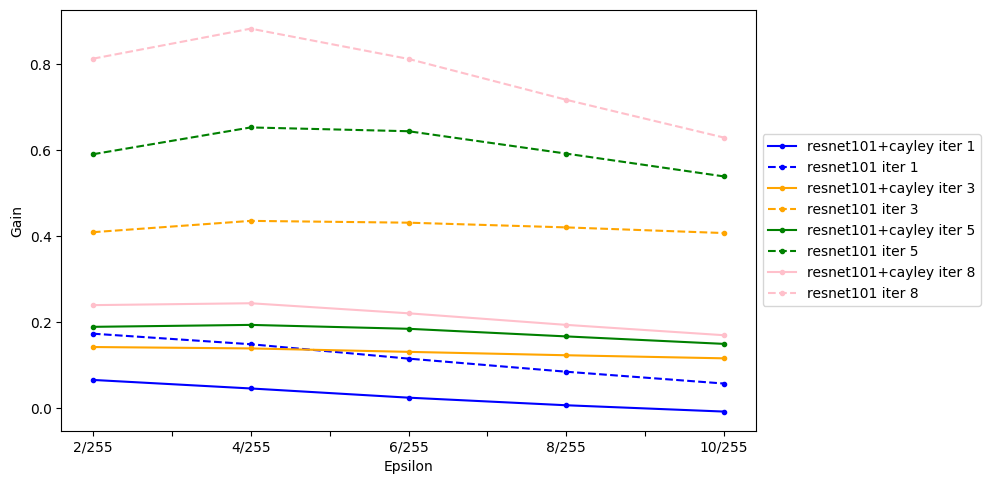

In [20]:
group_cayley = [[("resnet101", "relu"),("resnet101+cayley", "relu")]]
epsilons = [2, 4, 6, 8, 10]
eps_labels = ['','2/255','','4/255','','6/255','','8/255','','10/255']
iters = [1.0, 3.0, 5.0, 8.0]
colors = ['blue', 'orange', 'green', 'pink']

fig, axs = plt.subplots(1,1, figsize=(8,5), subplot_kw={"xticks": list(range(1,11)),"xticklabels": eps_labels, "xlabel": "Epsilon", "ylabel": "Gain"})

fig.tight_layout()

for it, col in zip(iters, colors):
    for i in range(1):
        axis = axs
        grp = group_cayley[i]
        for arch, activ in grp:
            y_axis = res_cayley[(res_cayley["arch"]==arch)&(res_cayley["iterations"]==it)&(res_cayley["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
            # if ((arch, activ) == baseline[0]):
            #     axis.plot(epsilons, y_axis,'k--', marker=".",label=f"{arch} {activ}")
            # else:
            if ((arch, activ) != baseline[0]):
                axis.plot(epsilons, y_axis, marker=".",label=f"{arch} iter {int(it)}", color=col)
        y_axis = res_cayley[(res_cayley["arch"]==baseline[0][0])&(res_cayley["iterations"]==it)&(res_cayley["activation"]==baseline[0][1])].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
        axis.plot(epsilons, y_axis,'k--', marker=".",label=f"{baseline[0][0]} iter {int(it)}", color=col)
        # axis.legend(loc="upper right")
axis.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()